In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\data set\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe().round(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

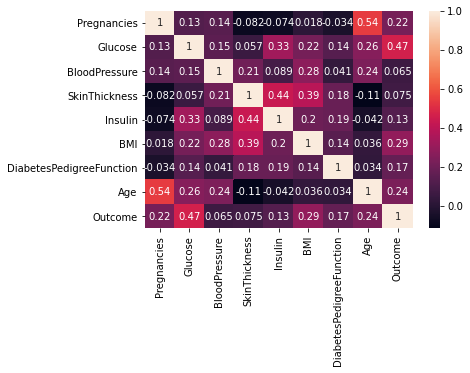

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df = df[df['Pregnancies']<12.5]
df =df[df['Glucose']>40]

In [9]:
df=df[df['BloodPressure']>40]
df=df[df['BloodPressure']<100]
df=df[df['SkinThickness']<60]
df=df[df['Insulin']<300]
df=df[df['BMI']<47]
df=df[df['BMI']>19]
df=df[df['DiabetesPedigreeFunction']<1.0]
df=df[df['Age']<60]

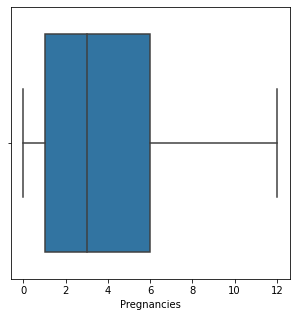

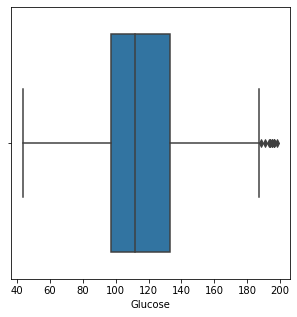

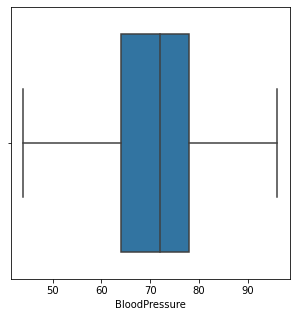

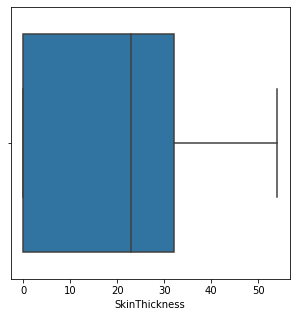

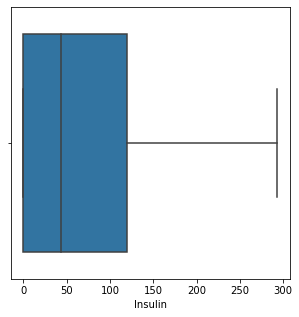

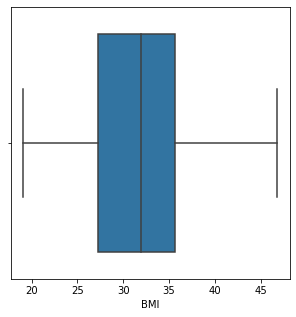

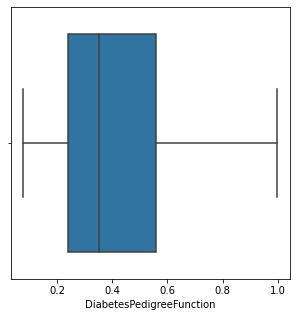

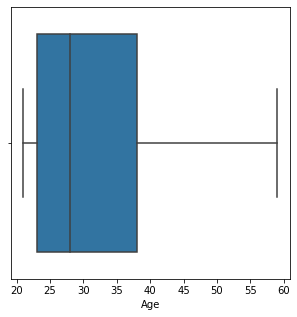

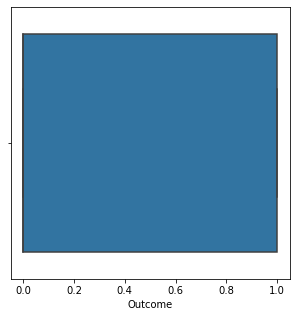

In [10]:
for i in df:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i])
    plt.show()

In [11]:
df.shape

(569, 9)

In [12]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [13]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y~x',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     34.86
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           1.01e-44
Time:                        02:15:58   Log-Likelihood:                -244.79
No. Observations:                 569   AIC:                             507.6
Df Residuals:                     560   BIC:                             546.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1061      0.130     -8.529      0.000      -1.361      -0.851
x[0]           0.0125      0.007      1.876      0.061      -0.001       0.026
x[1]           0.0070      0.001     11.411      0.000       0.006       0.008
x[2]          -0.0028      0.002     -1.674      0.095      -0.006       0.000
x[3]        8.432e-05      0.001      0.065      0.948      -0.002       0.003
x[4]          -0.0003      0.000     -1.274      0.203      -0.001       0.000
x[5]           0.0130      0.003      4.395      0.000       0.007       0.019
x[6]           0.2838      0.074      3.856      0.000       0.139       0.428
x[7]           0.0071      0.002      3.199      0.001       0.003       0.011
==============================================================================
Omnibus:                       29.128   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.069
Skew:                           0.547   Prob(JB):                     1.79e-07
Kurtosis:                       2.662   Cond. No.                     1.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.30,random_state=1998)

In [16]:
print(x.shape,x_train.shape,x_test.shape)

(569, 8) (398, 8) (171, 8)


In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [18]:
lr.fit(x_train,y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
print(confusion_matrix(y_test,lr.predict(x_test)))

[[112   9]
 [ 23  27]]


In [21]:
print(confusion_matrix(y_train,lr.predict(x_train)))

[[261  20]
 [ 60  57]]


In [22]:
print(accuracy_score(y_test,lr.predict(x_test)))

0.8128654970760234


In [23]:
print(accuracy_score(y_train,lr.predict(x_train)))

0.7989949748743719


In [24]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       121
           1       0.75      0.54      0.63        50

    accuracy                           0.81       171
   macro avg       0.79      0.73      0.75       171
weighted avg       0.81      0.81      0.80       171



In [25]:
print(classification_report(y_train,lr.predict(x_train)))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       281
           1       0.74      0.49      0.59       117

    accuracy                           0.80       398
   macro avg       0.78      0.71      0.73       398
weighted avg       0.79      0.80      0.78       398



#### conclusion : not performing well with logistic classification in this data

In [26]:
x = np.log(14/20)*(-14/20)

In [27]:
y = np.log(6/20)*(6/20)

In [28]:
x-y

0.6108643020548935